Welcome to my project

In [7]:
import gzip
import shutil

input_file = "/home/sgunnam/sushi/wsp/amazon_reviews/data/Grocery_and_Gourmet_Food_5.json.gz"
output_file_1 = "/home/sgunnam/sushi/wsp/amazon_reviews/data/Grocery_and_Gourmet_Food_5.json"

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file_1, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Unzipped successfully.")


Unzipped successfully.


In [8]:
import pandas as pd
file_path_1 = output_file_1 #r"C:\Users\sushm\Downloads\Grocery_and_Gourmet_Food.json"
df1 = pd.read_json(file_path_1, lines=True)


# file_path_2 = output_file_2 #r"C:\Users\sushm\Downloads\Grocery_and_Gourmet_Food.json"
# df2 = pd.read_json(file_path_2, lines=True)
df1.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN


In [9]:
df1.shape
df1.columns


Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143860 entries, 0 to 1143859
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1143860 non-null  int64 
 1   verified        1143860 non-null  bool  
 2   reviewTime      1143860 non-null  object
 3   reviewerID      1143860 non-null  object
 4   asin            1143860 non-null  object
 5   reviewerName    1143722 non-null  object
 6   reviewText      1143470 non-null  object
 7   summary         1143641 non-null  object
 8   unixReviewTime  1143860 non-null  int64 
 9   vote            158202 non-null   object
 10  style           592086 non-null   object
 11  image           9510 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 97.1+ MB


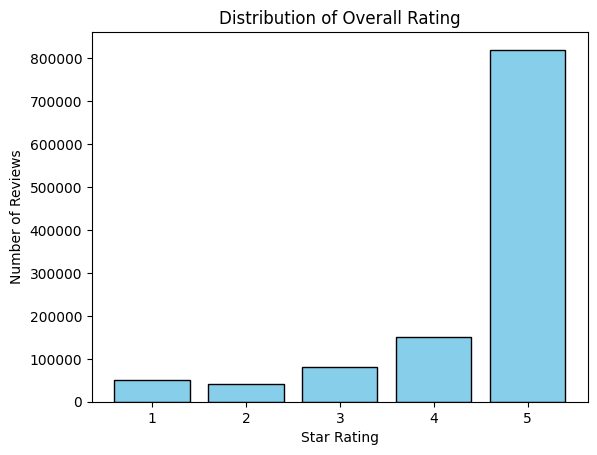

In [11]:
import matplotlib.pyplot as plt
rating_counts = df1['overall'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color ='skyblue', edgecolor='black')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Overall Rating')
plt.xticks(rating_counts.index)
plt.show()

There are 12 variables or columns and 1143860 rows in this dataset. the columns in the dataset are overall, verified, reviewTime, reviewID, asin, reviewername, reviewText, summary, unixReviewTime, vote, style, image.

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143860 entries, 0 to 1143859
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1143860 non-null  int64 
 1   verified        1143860 non-null  bool  
 2   reviewTime      1143860 non-null  object
 3   reviewerID      1143860 non-null  object
 4   asin            1143860 non-null  object
 5   reviewerName    1143722 non-null  object
 6   reviewText      1143470 non-null  object
 7   summary         1143641 non-null  object
 8   unixReviewTime  1143860 non-null  int64 
 9   vote            158202 non-null   object
 10  style           592086 non-null   object
 11  image           9510 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 97.1+ MB


In [13]:
df1.isnull().sum()/ len(df1)*100

overall            0.000000
verified           0.000000
reviewTime         0.000000
reviewerID         0.000000
asin               0.000000
reviewerName       0.012064
reviewText         0.034095
summary            0.019146
unixReviewTime     0.000000
vote              86.169461
style             48.237896
image             99.168605
dtype: float64

For this project 'overall','reviewText' and 'summary' are very important and there are 0, 390 and 219 missing values respectively in these variables. since imputing them leads to generation of synthetic data wich might compremise the quality of project or accuracy hence i would like to drop these missing vales especially from reviewText. and columns like 'vote', 'style' and 'image' have many missing values and they are not really important for my project hence i would like to drop them.

In [14]:
df1['verified'].value_counts()/len(df1)*100

verified
True     86.885371
False    13.114629
Name: count, dtype: float64

In [15]:
# dropping irrelavent columns
df1 = df1.drop(columns=['vote', 'style','image'])

In [16]:
# drop rows with missing reviewtext
df1 = df1[df1['reviewText'].notna()]

In [17]:
def label_sentiment(rating):
    if rating <=2:
        return 'negative'
    elif rating ==3:
        return 'neutral'
    else:
        return 'positive'
df1['sentiment'] = df1['overall'].apply(label_sentiment)

In [18]:
df1['sentiment'].value_counts(normalize=True)

sentiment
positive    0.848984
negative    0.080439
neutral     0.070576
Name: proportion, dtype: float64

Word Frequency Analysis

In [19]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens =[word for word in text.split() if word not in stop_words]
    return tokens
df1['tokens'] = df1['reviewText'].fillna('').apply(preprocess_text)

for sentiment in df1['sentiment'].unique():
    words = [word for tokens in df1[df1['sentiment'] == sentiment]['tokens'] for word in tokens]
    print(f'Top words for {sentiment}:')
    print(Counter(words).most_common(10))



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sgunnam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words for positive:
[('good', 288722), ('great', 274839), ('like', 215261), ('love', 186951), ('taste', 175054), ('flavor', 161382), ('tea', 134455), ('coffee', 131876), ('one', 125203), ('product', 122252)]
Top words for neutral:
[('like', 30102), ('taste', 27494), ('good', 25843), ('flavor', 22179), ('would', 13948), ('coffee', 13255), ('one', 13068), ('much', 12283), ('product', 11797), ('tea', 11332)]
Top words for negative:
[('like', 39797), ('taste', 34166), ('flavor', 21447), ('good', 18625), ('product', 18257), ('one', 17456), ('would', 15483), ('coffee', 14558), ('dont', 13524), ('tea', 12722)]


Generating WordCloud per sentiment

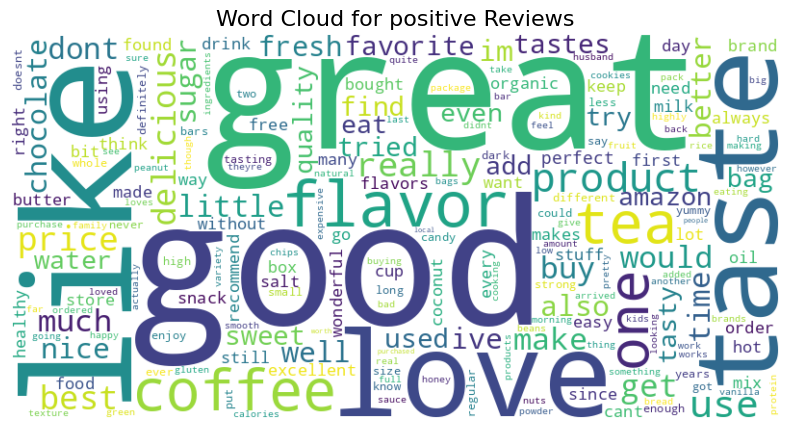

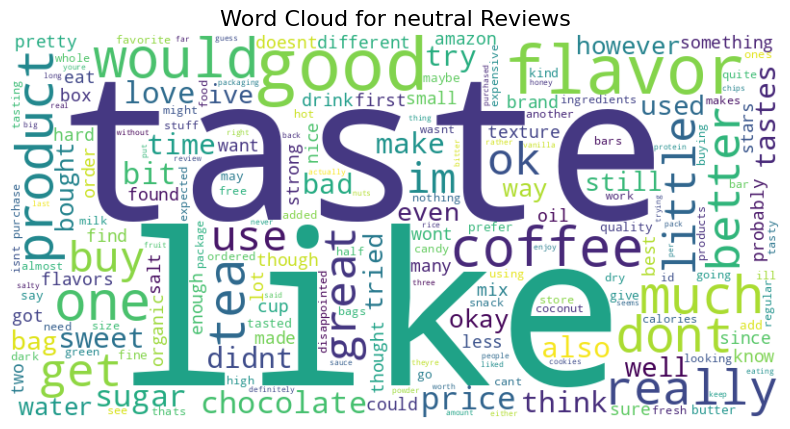

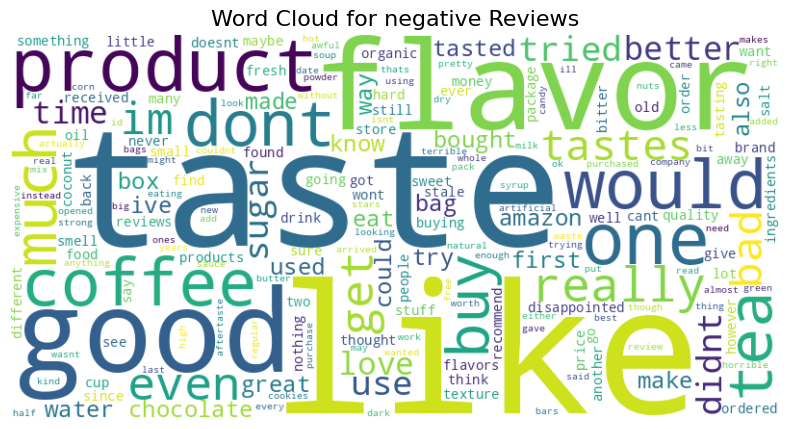

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Counter(words))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

for sentiment in df1['sentiment'].unique():
    words = [word for tokens in df1[df1['sentiment']==sentiment]['tokens'] for word in tokens]
    plot_wordcloud(words, f'Word Cloud for {sentiment} Reviews')


Time-based Trends in the data

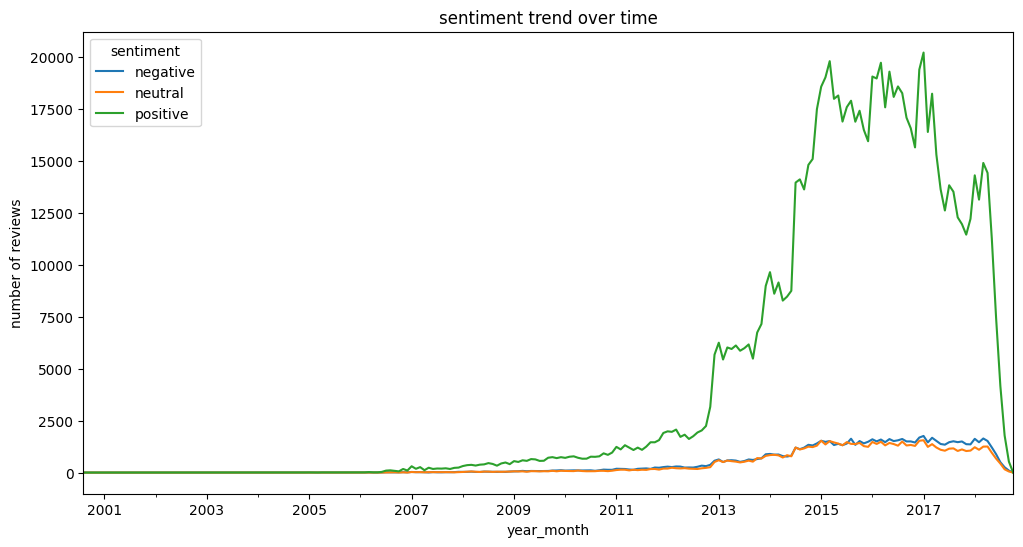

In [21]:
df1['reviewTime'] = pd.to_datetime(df1['reviewTime'])
df1['year_month'] = df1['reviewTime'].dt.to_period('M')
reviews_per_month = df1.groupby('year_month').size()
sentiment_trend = df1.groupby(['year_month', 'sentiment']).size().unstack(fill_value = 0)
sentiment_trend.plot(kind='line', figsize=(12,6))
plt.title('sentiment trend over time')
plt.ylabel('number of reviews')
plt.show()

In [22]:
# # Group and count reviews per month & sentiment
# sentiment_trend = df1.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)

# # Convert to percentage share per month
# sentiment_percent = sentiment_trend.div(sentiment_trend.sum(axis=1), axis=0) * 100

# # Plot
# sentiment_percent.plot(kind='line', figsize=(12,6))
# plt.title("Sentiment Share Over Time (%)")
# plt.ylabel("Percentage of Reviews")
# plt.xlabel("Year-Month")
# plt.legend(title="Sentiment")
# plt.show()


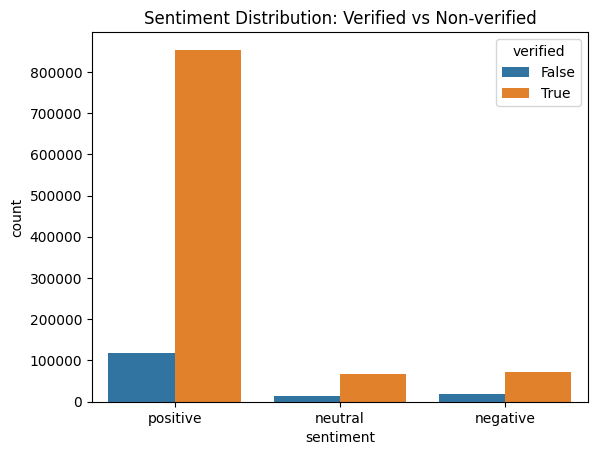

In [23]:
import seaborn as sns
sns.countplot(data=df1, x='sentiment', hue='verified')
plt.title('Sentiment Distribution: Verified vs Non-verified')
plt.show()

Labelling a Small Dataset of ~100 rows

In [24]:
sample_df =  df1.groupby('sentiment').apply(lambda x :x.sample(33, random_state=42)).reset_index(drop=True)
sample_df[['reviewText','sentiment']].to_csv('sample_for_manual_labelling.csv', index=False)
import os
print('Saved to:',os.path.abspath('sample_for_manual_labelling.csv'))

Saved to: /home/sgunnam/sushi/wsp/amazon_reviews/sample_for_manual_labelling.csv


Model Development

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['reviewText'], df1['sentiment'], stratify=df1['sentiment'], test_size=0.2, random_state=42)

TD-IDF + Logistic Regression

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words ='english')),
                  ('clf', LogisticRegression(max_iter=1000))])
model.fit(x_train, y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [21]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9028


In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.75      0.61      0.67     18396
     neutral       0.59      0.24      0.34     16140
    positive       0.92      0.99      0.95    194158

    accuracy                           0.90    228694
   macro avg       0.75      0.61      0.66    228694
weighted avg       0.89      0.90      0.89    228694



Model fiting usisng DistilBert

In [ ]:
# import pandas as pd

# train_df = pd.DataFrame({'text': x_train, 'label':y_train})
# test_df = pd.DataFrame({'text':x_test, 'label':y_test})

# label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
# train_df['label'] = train_df['label'].map(label_map)
# test_df['label'] = test_df['label'].map(label_map)


In [ ]:
# from datasets import Dataset
# train_dataset = Dataset.from_pandas(train_df)
# test_dataset = Dataset.from_pandas(test_df)


In [ ]:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# def tokenize(example):
#     return tokenizer(example['text'], truncation= True, padding ='max_length')

# train_tokenized = train_dataset.map(tokenize, batched=True)
# test_tokenized = test_dataset.map(tokenize, batched=True)

Map: 100%|██████████| 228694/228694 [00:34<00:00, 6618.87 examples/s]


In [ ]:
# from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
# model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

# training_args = TrainingArguments(output_dir="./bert_results",
#                     eval_strategy='epoch',  # Evaluate after each epoch
#                     save_strategy='epoch',       # Save after each epoch
#                     logging_strategy='epoch',    # Log every epoch
#                     num_train_epochs=2,
#                     per_device_train_batch_size=16,
#                     per_device_eval_batch_size=16,
#                     save_total_limit=1,
#                     load_best_model_at_end=True, # Load best model after training
#                 )

# trainer = Trainer(model = model,
#             args=training_args,
#             train_dataset=train_tokenized,
#             eval_dataset=test_tokenized,
#             tokenizer=tokenizer)
# trainer.train()

/tmp/ipykernel_9099/680575188.py:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model = model,
/home/sgunnam/miniconda3/lib/python3.10/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

Day 4 delivarables, Keywords extraction using Rake and entity extraction using spacy

In [ ]:
# from rake_nltk import Rake
# import spacy
# import nltk
# nltk.download('stopwords', quiet=True)
# nltk.download('punkt', quiet=True)

# import spacy
# # keep only NER to reduce overhead
# nlp = spacy.load("en_core_web_sm", disable=["tok2vec","tagger","attribute_ruler","lemmatizer"])

In [35]:
import os, pathlib, nltk

# 1) Force a writable NLTK data dir and add it to the search path
nltk_dir = pathlib.Path.home() / ".nltk_data"
nltk_dir.mkdir(parents=True, exist_ok=True)
os.environ["NLTK_DATA"] = str(nltk_dir)
if str(nltk_dir) not in nltk.data.path:
    nltk.data.path.insert(0, str(nltk_dir))

# 2) Download required corpora with hard failure on error
nltk.download("stopwords", quiet=True, raise_on_error=True)
nltk.download("punkt", quiet=True, raise_on_error=True)
# Some environments also need this new tokenizer table:
try:
    nltk.download("punkt_tab", quiet=True, raise_on_error=True)
except Exception:
    pass

# 3) Sanity checks: will raise LookupError if missing
nltk.data.find("corpora/stopwords")
nltk.data.find("tokenizers/punkt")


FileSystemPathPointer('/home/sgunnam/nltk_data/tokenizers/punkt')

In [36]:
r = Rake()


def extract_keywords(text, rake_obj = r, topk=5):
    if not isinstance(text, str) or not text.strip():
        return[]
    rake_obj.extract_keywords_from_text(text)
    return rake_obj.get_ranked_phrases()[:topk]
LABELS = {"PRODUCT","ORG","GPE","PERSON"}

def extract_entities(doc):
    return [ent.text for ent in doc.ents if ent.label_ in LABELS]

df1['keywords'] = df1['reviewText'].fillna("").apply(extract_keywords)
texts = df1['reviewText'].fillna("").tolist()
ents = []
for doc in nlp.pipe(texts, batch_size = 128):
    ents.append(extract_entities(doc))
df1['entities'] = ents


In [38]:
df1.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,sentiment,tokens,year_month,keywords,entities
0,5,True,2014-11-19,A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,positive,"[adverse, comment]",2014-11,[adverse comment],[]
1,5,True,2016-10-13,A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,positive,"[gift, college, student]",2016-10,"[college student, gift]",[Gift]
2,5,True,2015-11-21,A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,positive,"[like, strong, tea, might, even, little, strong]",2015-11,"[like strong tea, might even, strong, little]",[]
3,5,True,2015-08-12,A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,positive,"[love, tea, flavor, way, better, regular, lipt...",2015-08,"[regular lipton black tea, way better, definet...",[Lipton]
4,5,True,2015-05-28,A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,positive,"[searched, everywhere, browsed, amazon, found,...",2015-05,"[grocery store shelves, tea lipton, searched e...","[Amazon, Lipton]"
5,4,True,2015-05-09,A14MJZP7H1KHEX,4639725183,Carol Ann Nix,Tea made with Lipton Yellow Label teabags is m...,Four Stars,1431129600,positive,"[tea, made, lipton, yellow, label, teabags, mu...",2015-05,"[lipton yellow label teabags, regular lipton t...","[Lipton Yellow Label, Lipton]"
6,5,True,2015-05-07,A32CQJQBV7YRT,4639725183,Corsair174,"I love this tea! Okay, I'm not a high falutin...",Love this tea!,1430956800,positive,"[love, tea, okay, im, high, falutin, tea, snob...",2015-05,"[yellow label tea appears, white label lipton ...","[Lipton, Singapore, USA, Lipton]"
7,5,True,2015-01-28,A2EUMXCQHCP25R,4639725183,Metajohn,Discovered this tea at a local Med. Rest....a ...,Great tea,1422403200,positive,"[discovered, tea, local, med, resta, great, te...",2015-01,"[thanks amazon, rest ...., local med, everyone...",[Amazon]
8,4,True,2014-12-23,A3QD1PUOO5I94A,4639725183,B,Well I bought this tea after being in Malaysia...,Well I bought this tea after being in Malaysia...,1419292800,positive,"[well, bought, tea, malaysia, several, months,...",2014-12,"[try making teh tarik without using loose tea,...","[Malaysia, Lipton, Malaysia, U.S., Lipton, Lip..."
9,5,True,2014-12-17,A9E9L159FFMHP,4639725183,S. Wood,We really like this tea. It is definitely dif...,We really like this tea,1418774400,positive,"[really, like, tea, definitely, different, reg...",2014-12,"[somewhat stronger flavor, sink much faster, r...",[]


Day 4- Simulated real time streaming

In [39]:
import time
import logging
from rake_nltk import Rake
import spacy


In [42]:
df_stream = (df1.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True))
r = Rake()
nlp = spacy.load("en_core_web_sm")

def extract_keywords(text):
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()[:5]

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ['PRODUCT', 'ORG', 'GPE', 'PERSON']]

def classify_sentiment(text):
    if "bad" in text.lower() or "not" in text.lower() or "terrible" in text.lower() or "awful" in text.lower() or "disappointing" in text.lower():
        return "negative"
    elif "great" in text.lower() or "good" in text.lower() or "excellent" in text.lower() or "amazing" in text.lower():
        return "positive"
    else:
        return "neutral"
logging.basicConfig(filename='stream_log.txt', level=logging.INFO, format='%(asctime)s - %(message)s')

results = []
for index, row in df_stream.iterrows():
    print(f"Processing review ID: {index}")
    time.sleep(2)
    review_text = row['reviewText']
    sentiment = classify_sentiment(review_text)
    keywords = extract_keywords(review_text)
    entities = extract_entities(review_text)

    logging.info(f"Review: {review_text} | Sentiment: {sentiment} | Keywords: {keywords} | Entities: {entities}")
    results.append({
        'review_id': index,
        'reviewText': review_text,
        'sentiment': sentiment,
        'keywords': keywords,
        'entities': entities
    })
pd.DataFrame(results).to_csv('stream_output.csv', index=False)
print("Streaming simulation complete.")

Processing review ID: 0
Processing review ID: 1
Processing review ID: 2
Processing review ID: 3
Processing review ID: 4
Processing review ID: 5
Processing review ID: 6
Processing review ID: 7
Processing review ID: 8
Processing review ID: 9
Processing review ID: 10
Processing review ID: 11
Processing review ID: 12
Processing review ID: 13
Processing review ID: 14
Streaming simulation complete.


Day 5 Storage + Alerting system

In [3]:
import os, json, time, smtplib, psycopg2
from email.mime.text import MIMEText
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

In [ ]:
PG_DSN = os.getenv("PG_DSN", "host=127.0.0.1 dbname=reviews user=sgunnam password=sushi")
SMTP_HOST = os.getenv("SMTP_HOST", "sushmamutyala88.gmail.com")
SMTP_PORT = int(os.getenv("SMTP_PORT", "587"))
SMTP_USER = os.getenv("SMTP_USER", "sushmamutyala88@gmail.com")
SMTP_PASS = os.getenv("SMTP_PASS", "sushi")  # use an app password
MAIL_TO   = os.getenv("MAIL_TO",   "you@gmail.com")

def send_email(product_id, neg_count, window_start, window_end, created_at):
    subject = f"[ALERT] {product_id}: {neg_count} negatives in 10 min"
    body = (
        f"Product: {product_id}\n"
        f"Negatives (10-min): {neg_count}\n"
        f"Window: {window_start} → {window_end} UTC\n"
        f"Recorded at: {created_at} UTC\n"
    )
    msg = MIMEText(body)
    msg["Subject"] = subject
    msg["From"] = SMTP_USER
    msg["To"] = MAIL_TO
    with smtplib.SMTP(SMTP_HOST, SMTP_PORT) as s:
        s.starttls()
        s.login(SMTP_USER, SMTP_PASS)
        s.sendmail(SMTP_USER, [MAIL_TO], msg.as_string())

def main():
    while True:
        try:
            conn = psycopg2.connect(PG_DSN)
            conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
            cur = conn.cursor()
            cur.execute("LISTEN product_alerts_email;")
            while True:
                conn.poll()
                while conn.notifies:
                    n = conn.notifies.pop(0)
                    data = json.loads(n.payload)
                    send_email(
                        data["product_id"],
                        data["neg_count"],
                        data["window_start_utc"],
                        data["window_end_utc"],
                        data["created_at_utc"],
                    )
                time.sleep(0.5)
        except Exception as e:
            time.sleep(3)  # backoff and reconnect

if __name__ == "__main__":
    main()

In [ ]:
pip install psycopg2-binary
export PG_DSN="host=127.0.0.1 dbname=reviews user=sgunnam password=YOUR_DB_PASSWORD"
export SMTP_USER="you@gmail.com"
export SMTP_PASS="YOUR_GMAIL_APP_PASSWORD"   # create an App Password in Google Account > Security
export MAIL_TO="you@gmail.com"
python3 email_alert_listener.py


In [ ]:
INSERT INTO alerts (product_id, neg_count, window_start_utc, window_end_utc)
SELECT product_id, count(*), now() - interval '10 minutes', now()
FROM reviews
WHERE sentiment='negative' AND ts_utc >= now() - interval '10 minutes'
GROUP BY product_id
HAVING count(*) >= 5;
